# Machine Temperature Dataset – Exploration

This notebook explores the `machine_temperature_small.csv` dataset, a subset of the NAB dataset.  
We’ll perform basic data inspection, visualization, and compute rolling statistics to observe trends and variability.


In [17]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [18]:
# load data
url = "https://raw.githubusercontent.com/hjalalin/nab-anomaly-detection/main/data/realKnownCause/machine_temperature_system_failure.csv"
df = pd.read_csv(url)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)


## Quick Overview
Inspecting the shape, column types, and statistical summary of the data.


In [19]:
print("Shape:", df.shape)
print('')
print('Info:')
print(df.info())
print('')
print('statistical summary')
print(df.describe())


Shape: (22695, 1)

Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22695 entries, 2013-12-02 21:15:00 to 2014-02-19 15:25:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   22695 non-null  float64
dtypes: float64(1)
memory usage: 354.6 KB
None

statistical summary
              value
count  22695.000000
mean      85.926498
std       13.746912
min        2.084721
25%       83.080078
50%       89.408246
75%       94.016252
max      108.510543


## Plot Time Series
This plot shows the machine temperature over time. It visualizes trends patterns, sudden shifts or spikes that may indicate abnormal behavior or system faults.

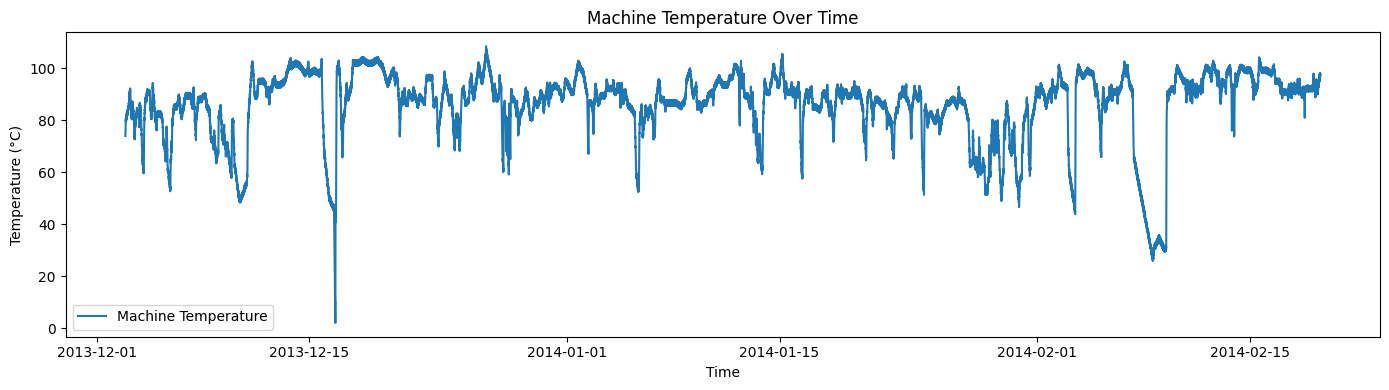

In [20]:
plt.figure(figsize=(14, 4))
plt.plot(df.index, df['value'], label='Machine Temperature')
plt.title("Machine Temperature Over Time")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.show()


The temperature is mostly stable with occasional sudden drops, which may indicate potential anomalies or system shut downs.

## Temperature Distribution
This histogram shows the distribution of temperature values, along with a smoothed density curve (KDE). It provides insight into the typical operating range and shows skewness or outliers in the data.

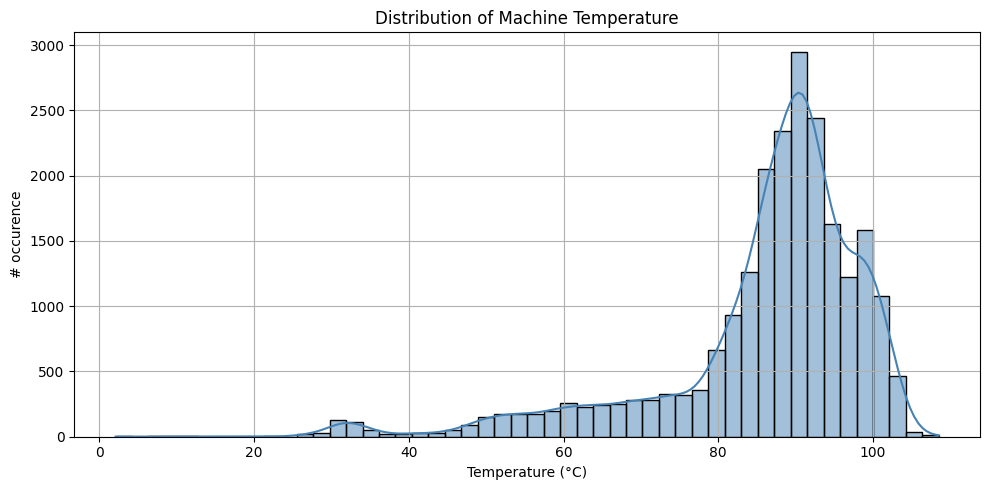

In [23]:
# Clean and plot
clean_values = df['value'].replace([np.inf, -np.inf], np.nan).dropna()

plt.figure(figsize=(10, 5))
sns.histplot(clean_values, bins=50, kde=True, color='steelblue')
plt.title('Distribution of Machine Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('# occurence')
plt.grid(True)
plt.tight_layout()
plt.show()

The distribution is right-skewed, with most temperatures concentrated between 85–95 °C. A small number of readings at much lower temperatures suggest rare but significant drops, likely corresponding to system anomalies or shutdowns.